In [1]:
import pandas as pd
import os, sys
from sklearn.neural_network import MLPClassifier

In [374]:
#input data

data = pd.DataFrame.from_csv("./app_stage_data.csv")

In [375]:
data

,duration,app_id,name,scale,exec_num,cpu_num,mem_num,tbl1_name,tbl2_name,completionTime-0,inputBytes-0,shuffleWriteBytes-0,completionTime-1,inputBytes-1,shuffleWriteBytes-1,completionTime-2,shuffleReadBytes-2
0,32820.0,app-20170609054755-0157,Q23-2-2-4-4-nation-region,2,2,4,4,nation,region,3.215,3336.0,2988.0,3.174,5.840000e+02,7.180000e+02,5.595,3.706000e+03
1,295591.0,app-20170602170922-0431,Q23-5-4-4-4-partsupp-lineitem,5,4,4,4,partsupp,lineitem,11.534,600091310.0,321019395.0,106.638,3.865016e+09,2.958217e+09,161.516,3.279236e+09
2,241715.0,app-20170606103815-0309,Q23-4-2-4-4-partsupp-lineitem,4,2,4,4,partsupp,lineitem,8.048,479801578.0,256549712.0,82.230,3.087317e+09,2.366017e+09,130.755,2.622566e+09
3,92357.0,app-20170606120224-0358,Q23-5-2-4-4-customer-order,5,2,4,4,customer,order,7.596,122145118.0,93287449.0,18.338,8.705805e+08,5.516327e+08,43.567,6.449201e+08
4,82115.0,app-20170609082207-0270,Q23-4-2-4-4-customer-order,4,2,4,4,customer,order,6.136,97731955.0,74657187.0,17.430,6.957432e+08,4.419742e+08,37.631,5.166313e+08
5,41954.0,app-20170603095808-0892,Q23-5-4-4-4-nation-region,5,4,4,4,nation,region,4.605,3336.0,2988.0,4.504,5.840000e+02,7.180000e+02,7.667,3.706000e+03
6,94872.0,app-20170609032714-0046,Q23-1-2-4-4-partsupp-lineitem,1,2,4,4,partsupp,lineitem,5.504,118998996.0,63514715.0,22.254,7.601910e+08,5.870883e+08,42.869,6.506031e+08
7,64169.0,app-20170602153802-0356,Q23-4-4-4-4-supplier-partsupp,4,4,4,4,supplier,partsupp,9.057,479801578.0,256543769.0,8.005,5.718582e+06,4.666360e+06,26.197,2.612101e+08
8,67479.0,app-20170602144252-0339,Q23-4-4-4-4-part-partsupp,4,4,4,4,part,partsupp,9.001,479801578.0,253026735.0,11.516,9.693397e+07,7.012324e+07,26.396,3.231500e+08
9,276820.0,app-20170602104539-0251,Q23-3-4-4-4-partsupp-lineitem,3,4,4,4,partsupp,lineitem,9.215,359551313.0,192097578.0,65.850,2.310172e+09,1.770564e+09,155.810,1.962662e+09


In [536]:
Y = data.loc[:1000, ["duration"]]

In [487]:
X = data.loc[:1000, ["scale", "exec_num", "cpu_num", 
                 "mem_num", "inputBytes-0", "inputBytes-1"]]
# X = data.loc[:1000, ["completionTime-2"]]

In [470]:
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X, norm='l1')
X_normalized

array([[  5.08905852e-04,   1.01781170e-03,   1.01781170e-03,
          8.48854962e-01,   1.48600509e-01],
       [  8.95835058e-10,   8.95835058e-10,   8.95835058e-10,
          1.34395708e-01,   8.65604289e-01],
       [  5.60676657e-10,   1.12135331e-09,   1.12135331e-09,
          1.34506772e-01,   8.65493225e-01],
       ..., 
       [  4.29115351e-09,   4.29115351e-09,   4.29115351e-09,
          1.84475953e-01,   8.15524035e-01],
       [  1.64162397e-07,   1.64162397e-07,   1.64162397e-07,
          9.99862596e-01,   1.36911439e-04],
       [  8.23858663e-09,   8.23858663e-09,   8.23858663e-09,
          9.88221717e-01,   1.17782583e-02]])

In [385]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(8,2), random_state=1)
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

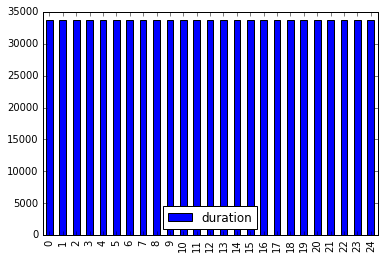

In [506]:
Y_test = data.loc[1001:1025, ["duration"]]
X_test = data.loc[1001:1025, ["scale", "exec_num", "cpu_num", 
                              "mem_num", "inputBytes-0", "inputBytes-1"]]
# X_test = data.loc[1001:1100, ["completionTime-2"]]

Y_pred = clf.predict(X_test)
Y_pred = pd.DataFrame(data={"duration": Y_pred})
Y_pred.plot(kind='bar')

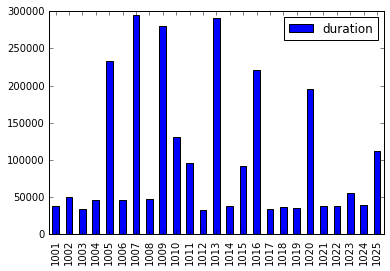

In [508]:
Y_test.plot(kind='bar')

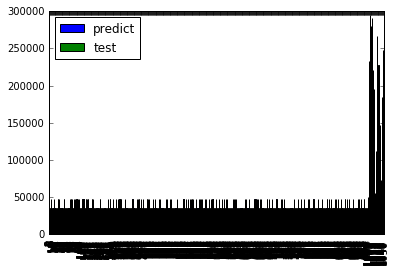

In [382]:
plot = pd.DataFrame(data={"test": Y_test["duration"],
                         "predict": Y_pred["duration"]})
plot.plot(kind='bar')

In [481]:
# Bayesian Ridge Regression
from sklearn import linear_model
from sklearn.utils import column_or_1d
reg = linear_model.BayesianRidge()
Y = column_or_1d(Y, warn=True)
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [539]:
# Lasso Regression
from sklearn import linear_model
from sklearn.utils import column_or_1d
reg = linear_model.LassoLars(alpha=.1)
reg.fit(X, Y)

LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [540]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(data={"duration": y_pred}, index=range(1001, 1026))

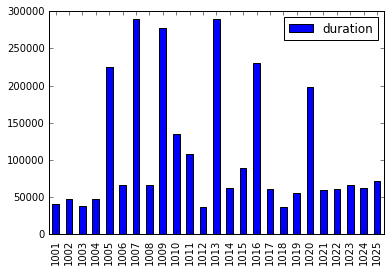

In [541]:
y_pred.plot(kind='bar')

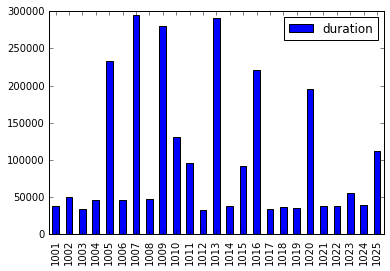

In [542]:
Y_test.plot(kind='bar')

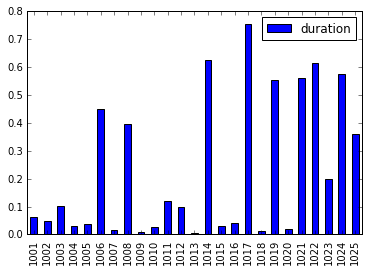

In [546]:
((y_pred - Y_test).abs() / Y_test).plot(kind='bar')

In [547]:
# Lasso Regression
from sklearn import linear_model
from sklearn.utils import column_or_1d
reg = linear_model.MultiTaskElasticNet()
reg.fit(X, Y)

MultiTaskElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
          max_iter=1000, normalize=False, random_state=None,
          selection='cyclic', tol=0.0001, warm_start=False)

In [548]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(data={"duration": y_pred}, index=range(1001, 1026))
y_pred.plot(kind='bar')
Y_test.plot(kind='bar')

Exception: Data must be 1-dimensional